In [1]:
from settings import *


random_rho0s: setting seed=35288


In [2]:
qubits = TriangularLayoutAB(m=1, cutoff=1, distance=0.9)
operations = [("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

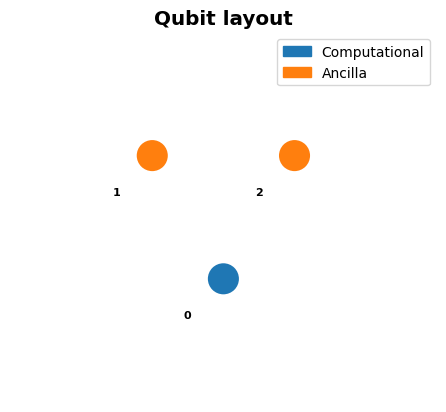

In [3]:
qubits.show_layout()

In [4]:
qubits.gate_connections

[GateConnection(id1=0, id2=1, d=0.9),
 GateConnection(id1=0, id2=2, d=0.9),
 GateConnection(id1=1, id2=2, d=0.9)]

In [5]:
# theta_init = np.load("both_theta_opt.npy")

In [6]:
theta_opt, errors, thetas = optimize(circuit, training_data, max_count=400, n_grad=10)

np.save("both_theta_opt", theta_opt)
np.save("both_thetas", thetas)
np.save("both_errors", errors)

optimizer (optimization indices): setting seed=30142


C:\Users\Admin\Desktop\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


Iteration: 0 
            Max gradient term: 0.034387842165820026 
            Current gradient: [ 0.02675095  0.          0.          0.          0.          0.02044256
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.00567308  0.          0.          0.          0.00567308  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.0247312   0.          0.          0.          0.          0.
  0.          0.          0.          0.02264594  0.          0.
  0.         -0.05626815  0.          0.          0.          0.
  0.          0.         -0.01526196  0.          0.          0.
  0.          0.          0.          0.03438784  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.01880099  0.          

In [7]:
theta_opt = np.load("both_theta_opt.npy")
thetas = np.load("both_thetas.npy")
errors = np.load("both_errors.npy")

In [8]:
theta_opt

array([0.39735481, 1.        , 1.        , 0.81881703, 0.97107381,
       0.77490712, 0.76804942, 0.96884829, 0.99707873, 0.95414807,
       1.00652998, 0.987275  , 0.98018119, 1.0018975 , 1.02116277,
       1.02414794, 0.9551862 , 0.99014008, 0.95681395, 0.98441012,
       1.21304733, 1.06275198, 0.96621233, 0.98536855, 0.95814001,
       1.02607586, 1.05117829, 1.02467486, 1.12757137, 0.9987145 ,
       0.99012574, 0.98095515, 1.11450521, 0.94792109, 1.02257957,
       1.0280632 , 0.79089312, 0.98321322, 0.98329703, 0.94426712,
       1.05000196, 1.02192384, 0.98865489, 0.94227315, 0.99929231,
       0.7019275 , 1.00464474, 0.99251913, 0.98200938, 1.58287984,
       0.97299954, 0.99725035, 0.98460331, 1.00994863, 0.96827136,
       0.98272429, 1.13779162, 0.991735  , 1.02596184, 0.9897898 ,
       0.97481451, 1.00023694, 1.01926514, 0.67940986, 0.95536174,
       0.96183774, 0.96490172, 1.00201944, 0.99913066, 0.98831916,
       0.94797523, 1.12501646, 0.9769459 , 1.04136177, 0.97318

rho_rand_haar: seed=25095


c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. ])

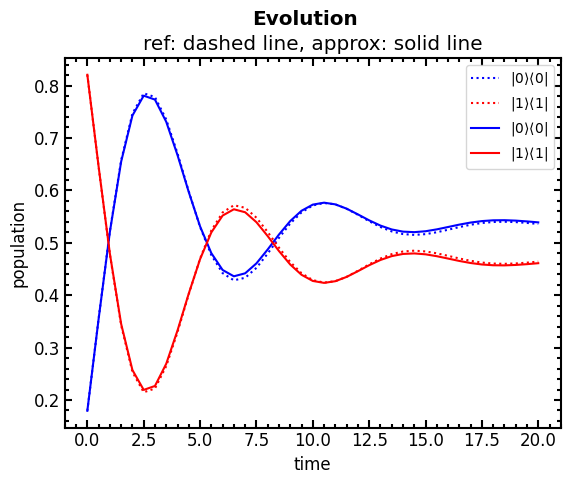

In [9]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(40, rho0.full())

Os = [O.full() for O in create_observables_comp_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.5, N=40, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(1))
ts

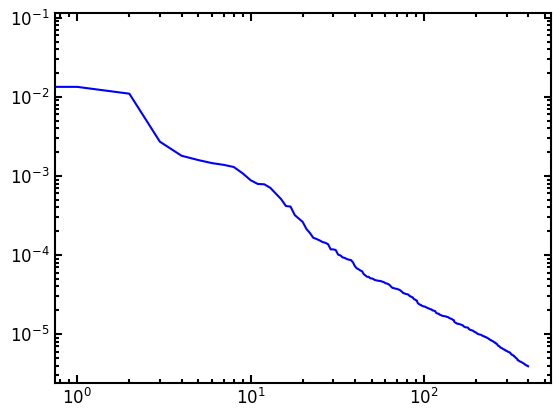

In [10]:
plt.loglog(errors)